In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We start off by loading and then merging the datasets we want to use:

In [2]:
dat1 = pd.read_csv('key.csv', sep=',')
dat2 = pd.read_csv('SP500_finratios.csv', sep=',', parse_dates=['adate', 'qdate', 'public_date'])
dat3 = pd.read_csv('ratings2.csv', sep=',', parse_dates=['datadate'])

In [3]:
#the columns of the first data set are renamed to match the names of the other data sets
dat1.columns = ['gvkey','linktype','permno','permco','linkdt','linkenddt','conm','tic','cusip']

In [4]:
#the duplicates in the key data set are removed, so that pd.merge() will work
dat1 = dat1.set_index('permno')
dat1 = dat1[~dat1.index.duplicated(keep='first')]
dat1.reset_index(level=0, inplace=True)   #The permnos are converted back to a normal variable, otherwise an error can occur when merging on permno

In [5]:
#the variable datadate is renamed public_date and both are transformed to the same format, so
# that pd.merge()recognises them as one and the same
dat3['public_date'] = dat3['datadate']
del dat3['datadate']
dat2['public_date'] = pd.to_datetime(dat2.public_date)
dat3['public_date'] = pd.to_datetime(dat3.public_date)

In [6]:
dat1and2 = pd.merge(dat1, dat2, on='permno', how='inner', validate='one_to_many')

In [7]:
dat = pd.merge(dat1and2, dat3, on=['gvkey', 'public_date', 'conm', 'tic', 'cusip'], how='inner', validate='one_to_one')

In [8]:
dat

,permno,gvkey,linktype,permco,linkdt,linkenddt,conm,tic,cusip,adate,...,debt_capital,de_ratio,cash_ratio,quick_ratio,curr_ratio,at_turn,ptb,PEG_trailing,DIVYIELD,splticrm
0,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2008-12-31,...,1.338,-9.366,0.428,0.603,0.664,0.816,NaN,NaN,NaN,B-
1,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN,NaN,B-
2,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN,NaN,B-
3,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN,NaN,B-
4,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.366,-8.617,0.551,0.712,0.780,0.799,NaN,NaN,NaN,B-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29853,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.286,0.741,1.478,1.961,1.961,0.726,9.038,9.364,NaN,NaN
29854,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.278,0.775,1.467,2.010,2.010,0.678,8.184,10.913,NaN,NaN
29855,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.278,0.775,1.467,2.010,2.010,0.678,9.392,12.469,NaN,NaN
29856,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.278,0.775,1.467,2.010,2.010,0.678,8.557,11.359,NaN,NaN


In [9]:
#just a little indulgence
class color:
   purple = '\033[95m'
   cyan = '\033[36m'
   blue = '\033[94m'
   green = '\033[92m'
   yellow = '\033[93m'
   red = '\033[91m'
   bold = '\033[1m'
   underline = '\033[4m'
   end = '\033[0m'

Now that we have the data, let's have a look at it. First of, we're interested in the distribution of the ratings:

In [10]:
dat['splticrm'].value_counts()

BBB     4946
BBB+    4133
A-      3615
A       3196
BBB-    2654
A+      1670
BB+     1262
AA-      902
BB-      824
BB       757
AA       417
B+       305
AAA      296
AA+      199
B-       133
B        109
CCC+      50
D          4
CCC        2
Name: splticrm, dtype: int64

Seeing as there are only four observations of rating D, and only two observations of rating CCC, our data set does not allow us to draw any conclusions for these ratings and we have to drop them from our sample.

In [11]:
dat = dat[dat['splticrm'] != 'CCC']
dat = dat[dat['splticrm'] != 'D']

Following that, we consider our numerical data:

In [12]:
des = dat.loc[:, 'bm':'cash_lt'].describe()
ind = [3, 1, 5, 7]   #printing the entire .describe() information consumes unnecessarily much computation power, so I index the lines I'm interested in
print(des.iloc[ind], '\n')
des = dat.loc[:, 'invt_act':].describe()  #I do this in two steps, because I don't want any variables hidden behind "..."
ind = [3, 1, 5, 7]
print(des.iloc[ind])

              bm          ps         pcf        dpr        npm        gpm  \
min     0.001000    0.047000 -224.460000  -0.001000 -51.493000 -37.707000   
mean    0.511099    2.530784   12.210846   0.489392   0.080365   0.431986   
50%     0.391000    1.814000   11.113000   0.305000   0.092000   0.406000   
max   137.237000  145.774000  280.893000  80.554000   1.799000   0.982000   

            cfm       roa        roe      roce     efftax     GProf  \
min  -47.694000 -0.595000 -34.647000 -1.111000 -12.365000 -1.143000   
mean   0.152864  0.142624   0.166138  0.176364   0.290338  0.294441   
50%    0.152500  0.139000   0.137000  0.154000   0.302000  0.263500   
max    2.054000  0.626000  15.502000  2.279000  29.944000  1.255000   

      equity_invcap  debt_invcap  totdebt_invcap  capital_ratio     int_debt  \
min      -17.816000     0.000000        0.000000      -5.619000     0.000000   
mean       0.593529     0.389615        0.471293       0.395291     0.336795   
50%        0.63300

The output suggests that several variables have extreme outliers - for instance bm has a minimum of 0.001000, a mean of  0.506463, but a maximum of 137.237000. Visualising the data with boxplots shows this quite notably. As we want to use a multiple imputation method which relies on linear regression (see below), the skewness of the data is slightly problematic - OLS generally works with skewed data, but some outliers are so extreme we are worried they will have too big of an influence. So, in the hopes of improving our imputation method, we transform the variables with extreme outliers.

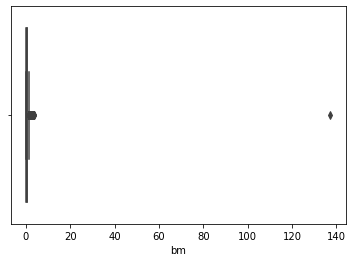

In [13]:
sns.boxplot(x = 'bm', data = dat)

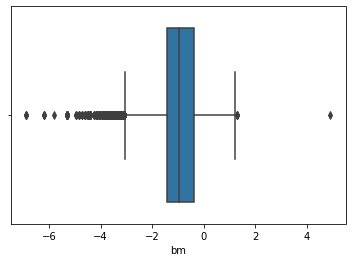

In [14]:
logbm = np.log(dat.loc[:, 'bm'])
sns.boxplot(x = logbm)

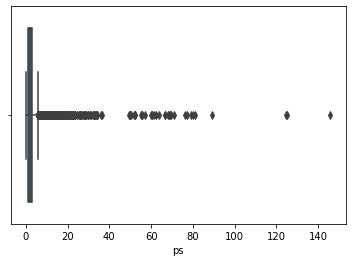

In [15]:
sns.boxplot(x = 'ps', data = dat)
# while also very skewed, the outliers here seem fitting for the distribution and OLS should be able to handle them
# I therefore leave this variable as it is, and I will from now on only show the boxplots for the variables I transform

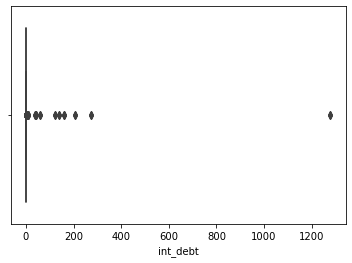

In [16]:
sns.boxplot(x = 'int_debt', data = dat)

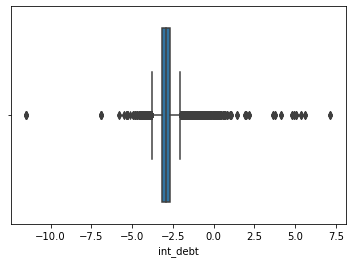

In [17]:
logint_debt = np.log(dat.loc[:, 'int_debt']+0.00001)
sns.boxplot(x = logint_debt)

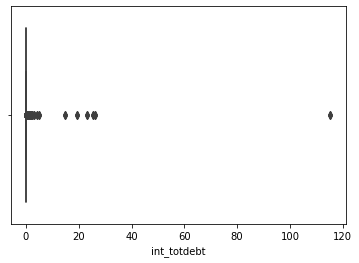

In [18]:
sns.boxplot(x = 'int_totdebt', data = dat)

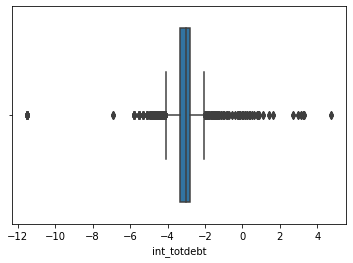

In [19]:
logint_totdebt = np.log(dat.loc[:, 'int_totdebt']+0.00001)
sns.boxplot(x = logint_totdebt)

In [20]:
# I create a new dataframe with the transformed variables
datwithlogs = pd.concat([logbm.to_frame(), logint_debt.to_frame(), logint_totdebt.to_frame()], axis = 'columns')
datwithlogs = pd.concat([datwithlogs, dat.loc[:, 'ps':'capital_ratio'], dat.loc[:, 'cash_lt':'PEG_trailing']], axis = 'columns')

In [21]:
datwithlogs

,bm,int_debt,int_totdebt,ps,pcf,dpr,npm,gpm,cfm,roa,...,dltt_be,debt_assets,debt_capital,de_ratio,cash_ratio,quick_ratio,curr_ratio,at_turn,ptb,PEG_trailing
0,NaN,-2.550918,-2.688101,0.113,-5.253,NaN,-0.072,0.163,-0.018,0.024,...,NaN,1.120,1.338,-9.366,0.428,0.603,0.664,0.816,NaN,NaN
1,NaN,-2.576890,-2.717949,0.153,3.287,NaN,-0.074,0.150,-0.018,0.010,...,NaN,1.137,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN
2,NaN,-2.576890,-2.717949,0.152,3.258,NaN,-0.074,0.150,-0.018,0.010,...,NaN,1.137,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN
3,NaN,-2.576890,-2.717949,0.123,2.640,NaN,-0.074,0.150,-0.018,0.010,...,NaN,1.137,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN
4,NaN,-2.576890,-2.688101,0.127,2.753,NaN,-0.079,0.150,-0.025,0.009,...,NaN,1.131,1.366,-8.617,0.551,0.712,0.780,0.799,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29853,-2.216407,-3.441707,-3.688480,8.444,27.185,0.0,0.181,0.968,0.234,0.238,...,0.223,0.426,0.286,0.741,1.478,1.961,1.961,0.726,9.038,9.364
29854,-2.282782,-3.381101,-3.649274,7.506,26.440,0.0,0.166,0.966,0.223,0.224,...,0.232,0.437,0.278,0.775,1.467,2.010,2.010,0.678,8.184,10.913
29855,-2.282782,-3.381101,-3.649274,8.614,30.344,0.0,0.166,0.966,0.223,0.224,...,0.232,0.437,0.278,0.775,1.467,2.010,2.010,0.678,9.392,12.469
29856,-2.282782,-3.381101,-3.649274,7.848,27.645,0.0,0.166,0.966,0.223,0.224,...,0.232,0.437,0.278,0.775,1.467,2.010,2.010,0.678,8.557,11.359


After looking at the data we have, we take a look at the data we do not have:

In [22]:
col_Names = dat.columns.values
total_NAs = pd.isna(dat).sum()
percentage_NAs = dat.isna().sum()/len(dat)
print(color.bold + "%-20s %-14s %s" %("Column Names", "Total NAs", "NAs per observations") + color.end )
#I used the % operator because tab didn't work and this allows me to define the spaces between the items

#the loop prints one line after another
for item_a, item_b, item_c in zip(col_Names, total_NAs, percentage_NAs):
    print("%-20s %-14d %.6f" %(item_a, item_b, item_c))

Column Names         Total NAs      NAs per observations
permno               0              0.000000
gvkey                0              0.000000
linktype             0              0.000000
permco               0              0.000000
linkdt               0              0.000000
linkenddt            0              0.000000
conm                 0              0.000000
tic                  0              0.000000
cusip                0              0.000000
adate                13             0.000435
qdate                0              0.000000
public_date          0              0.000000
bm                   638            0.021372
ps                   12             0.000402
pcf                  27             0.000904
dpr                  1862           0.062374
npm                  12             0.000402
gpm                  12             0.000402
cfm                  98             0.003283
roa                  27             0.000904
roe                  666            0.02231

As shown here, 4384 observations have no long term credit rating (splticrm), which means we cannot use those observations for our prediction models. Still, the observations might be helpful for imputing missing values, so we will drop them later.

Another variable that stands out is PEG_trailing, where one third of the observations is missing. The large amount of missing values does not mean we have to dispense with the variable, though. As shown in https://www.sciencedirect.com/science/article/pii/S0895435618308710 we can use multiple imputation even with large amounts of missing data.

However, multiple imputation is based on the assumption of **missing at random**, where "conditional on the observed data, the probability of missingness is independent of unobserved data". (Same source.) This is of course impossible to test, since we will never know what the unobserved data is. What makes the evaluation even harder is that we were not involved in the data collection, and have no way of finding out why data is missing. However, as all companies are bound to reporting standards - meaning they cannot change what data to publish on a whim - we believe the assumption is reasonable. By contrast, it is relatively easy to show that the data is not missing completely at random: Simply plotting the relationship between for instance pcf and the missingness of PEG_trailing shows that there exists a pattern.

(For further explanations on the differences between missing at random, missing not at random, and missing completely at random, see our paper.)

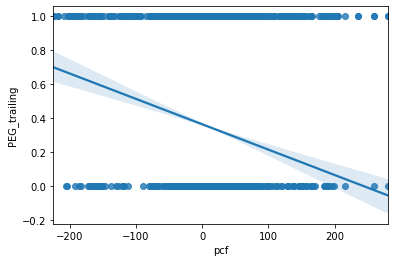

In [23]:
sns.regplot(dat.pcf, dat.PEG_trailing.isna())

So now, we fill in the missing data by using multiple imputation. The imputation method is a modeling of each feature with missing values as a function of other features in a round-robin regression. This is where our log-transformations of bm, int_debt, and int_totdebt are needed, because when we used the raw data, the outliers would influence the regressions so much that some negative values were imputed. Once we have several data sets with different imputed values, we take the average of those.

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [25]:
# this takes a while, be patient
d = {}   # this dictionary will store the different sets of data
for i in range(1,6):
    imp = IterativeImputer(estimator = BayesianRidge(), n_nearest_features = 23, sample_posterior=True, random_state = i)
    # about the arguments: BayesianRidge() is just linear regression; sample_posterior is needed for multiple imputations; 
    # n_nearest_features speeds up the computation by using only n features in the regression; random_state is set.seed
    d['imp_set_%s' %(i)] = imp.fit_transform(datwithlogs)   # fits the imputer on the data & returns data with imputations

In [26]:
average = (d['imp_set_1'] + d['imp_set_2'] + d['imp_set_3'] + d['imp_set_4'] + d['imp_set_5'])/ 5

In [27]:
average = pd.DataFrame(data = average, columns = datwithlogs.columns.values)   # transforms array to data frame

Now that we have a full set of data, we transform the variables bm, int_debt and int_totdebt back to their normal scale.

In [28]:
backtransbm = np.exp(average.loc[:, 'bm'])
backtransdebt = np.exp(average.loc[:, 'int_debt'])-0.00001   # -0.00001 because we had to add a constant for the log-transformation
backtranstotdebt = np.exp(average.loc[:, 'int_totdebt'])-0.00001
mi_imputed = pd.concat([backtransbm.to_frame(), backtransdebt.to_frame(), backtranstotdebt.to_frame()], axis = 'columns')
mi_imputed = pd.concat([mi_imputed, average.loc[:, 'ps':]], axis = 'columns')

Now that the missing data is imputed, we add public_date and splticrm to the data frame. As we do not need the observations with missing splticrm anymore, we delete them.

In [29]:
mi_imputed = pd.concat([mi_imputed, dat.loc[:, 'public_date'], dat.loc[:, 'splticrm']], axis = 'columns')
mi_imputed = mi_imputed.dropna(axis = 'rows', how = 'any')

In [30]:
mi_imputed

,bm,int_debt,int_totdebt,ps,pcf,dpr,npm,gpm,cfm,roa,...,debt_capital,de_ratio,cash_ratio,quick_ratio,curr_ratio,at_turn,ptb,PEG_trailing,public_date,splticrm
0,0.322299,0.078,0.068,0.113,-5.253,1.243543,-0.072,0.163,-0.018,0.024,...,1.338,-9.366,0.428,0.603,0.664,0.816,9.847653,2.330383,2010-01-31,B-
1,0.211314,0.076,0.066,0.153,3.287,1.376194,-0.074,0.150,-0.018,0.010,...,1.376,-8.291,0.629,0.787,0.859,0.787,14.086053,4.427836,2010-02-28,B-
2,0.296998,0.076,0.066,0.152,3.258,1.047241,-0.074,0.150,-0.018,0.010,...,1.376,-8.291,0.629,0.787,0.859,0.787,11.980858,3.751587,2010-03-31,B-
3,0.178448,0.076,0.066,0.123,2.640,1.058137,-0.074,0.150,-0.018,0.010,...,1.376,-8.291,0.629,0.787,0.859,0.787,14.147788,2.668130,2010-04-30,B-
4,0.353255,0.076,0.068,0.127,2.753,0.859673,-0.079,0.150,-0.025,0.009,...,1.366,-8.617,0.551,0.712,0.780,0.799,12.047912,1.606472,2010-05-31,B-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29832,0.078000,0.032,0.027,11.083,28.586,0.000000,0.243,0.982,0.279,0.258,...,0.342,0.728,1.982,2.851,2.851,0.650,11.906000,4.075932,2016-09-30,BBB
29833,0.074000,0.031,0.026,13.734,37.120,0.000000,0.217,0.981,0.256,0.239,...,0.321,0.704,1.986,2.595,2.595,0.682,14.784000,-2.712456,2016-10-31,BBB
29834,0.074000,0.031,0.026,12.452,33.655,0.000000,0.217,0.981,0.256,0.239,...,0.321,0.704,1.986,2.595,2.595,0.682,13.404000,5.331141,2016-11-30,BBB
29835,0.074000,0.031,0.026,11.099,29.996,0.000000,0.217,0.981,0.256,0.239,...,0.321,0.704,1.986,2.595,2.595,0.682,11.947000,6.120813,2016-12-31,BBB


Finally, the time has come to train our prediction model. We assume that including all variables will lead to overfitting, and using just a subset of all variables should improve the result. We test that assumption by trying out both.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [32]:
X = mi_imputed.loc[:, :'PEG_trailing']   # using all variables at our disposal
y = pd.factorize(mi_imputed.loc[:, 'splticrm'])[0]

In [33]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [34]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.96
Test score:       0.96
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [35]:
subset = ['roe', 'curr_ratio', 'bm', 'de_ratio', 'dpr', 'at_turn', 'debt_ebitda']   # using just a subset
X = mi_imputed.loc[:, subset]

In [36]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [37]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.95
Test score:       0.96
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


When comparing both models, it turns out that using all variables is actually more helpful than using just a subset of variables. Apparently, random forest is not very susceptible to overfitting. Next, we try a support vector classifier (SVC).

In [39]:
X = mi_imputed.loc[:, :'PEG_trailing']   # using all variables at our disposal
y = pd.factorize(mi_imputed.loc[:, 'splticrm'])[0]

In [40]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [41]:
# Create Pipeline object with standard scaler and SVC estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', SVC())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [SVC(kernel='rbf')],
               'classifier__gamma': [1, 10],
               'classifier__C': [10, 100]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.91
Test score:       0.93
Best parameters: {'classifier': SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 'classifier__C': 100, 'classifier__gamma': 1, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [42]:
subset = ['roe', 'curr_ratio', 'bm', 'de_ratio', 'dpr', 'at_turn', 'debt_ebitda']   # using just a subset
X = mi_imputed.loc[:, subset]

In [43]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [44]:
# Create Pipeline object with standard scaler and SVC estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', SVC())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [SVC(kernel='rbf')],
               'classifier__gamma': [1, 10],
               'classifier__C': [10, 100]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.85
Test score:       0.87
Best parameters: {'classifier': SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'classifier__C': 100, 'classifier__gamma': 10, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
